以下のページからの引用

Pythonと移動計画(1)：線分のボロノイ図   
http://satemochi.blog.fc2.com/blog-entry-13.html

他に、以下も要確認  
http://www.nirarebakun.com/voro/segvoro.html

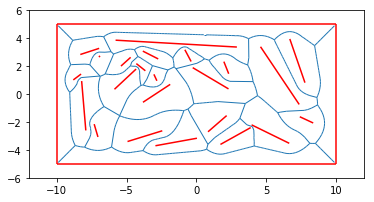

In [2]:
from itertools import chain
import math
import random
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import Voronoi
 
class line_segment:
    def __init__(self, coords):
        self.coords = coords
        self.points = self.__split()
 
    def __length(self):
        x0, y0 = self.coords[0]
        x1, y1 = self.coords[1]
        return math.sqrt((x0 - x1) * (x0 - x1) + (y0 - y1) * (y0 - y1))
 
    def __split(self):
        n = self.__length() / 0.2
        dx = (self.coords[1][0] - self.coords[0][0]) / n
        dy = (self.coords[1][1] - self.coords[0][1]) / n
        points = [self.coords[0]]
        for i in range(1, int(n)):
            points.append([self.coords[0][0] + dx*i, self.coords[0][1] + dy*i])
        return points + [self.coords[1]]
 
    def opposite(self, p, q):
        judge1 = (p in self.points) and (q not in self.points)
        judge2 = (p not in self.points) and (q in self.points)
        return judge1 or judge2

class line_voro:
    def __init__(self, L):
        self.lines = [line_segment(l) for l in L]
        self.points = list(chain.from_iterable([l.points for l in self.lines]))
        self.ridges = []
        self.__preproc()
 
    def __is_ridge(self, p, q):
        for l in self.lines:
            if l.opposite(p.tolist(), q.tolist()) == True:
                return True
        return False
 
    def __preproc(self):
        vor = Voronoi(self.points)
        V = vor.vertices
        for j, ridge in enumerate(vor.ridge_vertices):
            if -1 not in ridge:
                p, q = vor.ridge_points[j]
                if self.__is_ridge(vor.points[p], vor.points[q]):
                    self.ridges.append([(V[ridge[0]][0], V[ridge[0]][1]),
                                        (V[ridge[1]][0], V[ridge[1]][1])])
    def draw(self):
        lc = mc.LineCollection([l.coords for l in self.lines], color='r')
        lc2 = mc.LineCollection(self.ridges, linewidths=1)
        fig, ax = plt.subplots()
        ax.set_aspect('equal', adjustable='box')
        ax.add_collection(lc)
        ax.add_collection(lc2)
        ax.autoscale()
        ax.margins(0.1)
        plt.show()

def random_segs(n=50):
    points = [[random.uniform(-9,9), random.uniform(-4,4)] for i in range(n)]
    tri = Delaunay(points)
    checked = {i: False for i in range(len(points))}
    segs = []
    for s in tri.simplices:
        for i in range(len(s)):
            if checked[s[i]] == False and checked[s[(i+1) % len(s)]] == False:
                segs.append([points[s[i]], points[s[(i+1) % len(s)]]])
                checked[s[i]], checked[s[(i+1) % len(s)]] = True, True
    return segs
 
if __name__ == '__main__':
    bounds = [[[-10,-5], [10,-5]], [[10,-5], [10,5]], [[10,5], [-10,5]],
              [[-10,5], [-10,-5]]]
    segs = random_segs()
    lv = line_voro(segs + bounds)
    lv.draw()